In [1]:
import numpy as np
import anjl
import plotly.io

In [2]:
plotly.io.renderers.default = "plotly_mimetype+notebook_connected"

## Example 1

In [3]:
D1 = np.array(
    [  # A B C D
        [0, 4, 5, 10],
        [4, 0, 7, 12],
        [5, 7, 0, 9],
        [10, 12, 9, 0],
    ],
    dtype=np.float32,
)
Z1 = anjl.canonical_nj(D1)
Z1

array([[0. , 1. , 1. , 3. , 2. ],
       [2. , 4. , 2. , 2. , 3. ],
       [3. , 5. , 3.5, 3.5, 4. ]], dtype=float32)

In [4]:
root1 = anjl.to_tree(Z1)
print(root1)

Node(id=6, dist=0, count=4)
    Node(id=3, dist=3.5, count=1)
    Node(id=5, dist=3.5, count=3)
        Node(id=2, dist=2.0, count=1)
        Node(id=4, dist=2.0, count=2)
            Node(id=0, dist=1.0, count=1)
            Node(id=1, dist=3.0, count=1)


In [5]:
df_internal_nodes, df_leaf_nodes, df_edges = anjl.layout_equal_angle(tree=root1)

In [6]:
df_leaf_nodes

x         y  id
0  2.474874  2.474874   3
1 -1.060660 -3.889087   2
2 -5.181981 -3.181981   0
3 -6.596194 -0.353553   1

In [7]:
df_internal_nodes

x         y  id
0  0.000000  0.000000   6
1 -2.474874 -2.474874   5
2 -4.474874 -2.474874   4

In [8]:
df_edges

x         y
0   0.000000  0.000000
1   2.474874  2.474874
2        NaN       NaN
3   0.000000  0.000000
4  -2.474874 -2.474874
5        NaN       NaN
6  -2.474874 -2.474874
7  -1.060660 -3.889087
8        NaN       NaN
9  -2.474874 -2.474874
10 -4.474874 -2.474874
11       NaN       NaN
12 -4.474874 -2.474874
13 -5.181981 -3.181981
14       NaN       NaN
15 -4.474874 -2.474874
16 -6.596194 -0.353553
17       NaN       NaN

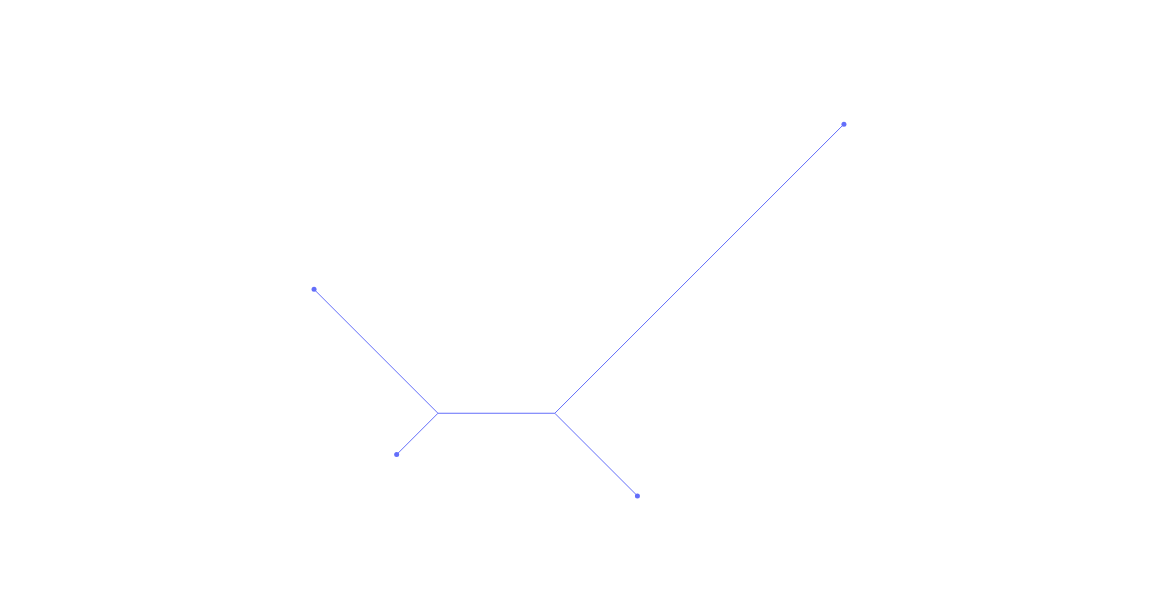

In [9]:
anjl.plot_equal_angle(root1)

## Example 2

In [10]:
D2 = np.array(
    [  # a b c d e
        [0, 5, 9, 9, 8],
        [5, 0, 10, 10, 9],
        [9, 10, 0, 8, 7],
        [9, 10, 8, 0, 3],
        [8, 9, 7, 3, 0],
    ],
    dtype=np.float32,
)
Z2 = anjl.canonical_nj(D2)
Z2

array([[0. , 1. , 2. , 3. , 2. ],
       [2. , 5. , 4. , 3. , 3. ],
       [3. , 6. , 2. , 2. , 4. ],
       [4. , 7. , 0.5, 0.5, 5. ]], dtype=float32)

In [11]:
root2 = anjl.to_tree(Z2)
print(root2)

Node(id=8, dist=0, count=5)
    Node(id=4, dist=0.5, count=1)
    Node(id=7, dist=0.5, count=4)
        Node(id=3, dist=2.0, count=1)
        Node(id=6, dist=2.0, count=3)
            Node(id=2, dist=4.0, count=1)
            Node(id=5, dist=3.0, count=2)
                Node(id=0, dist=2.0, count=1)
                Node(id=1, dist=3.0, count=1)


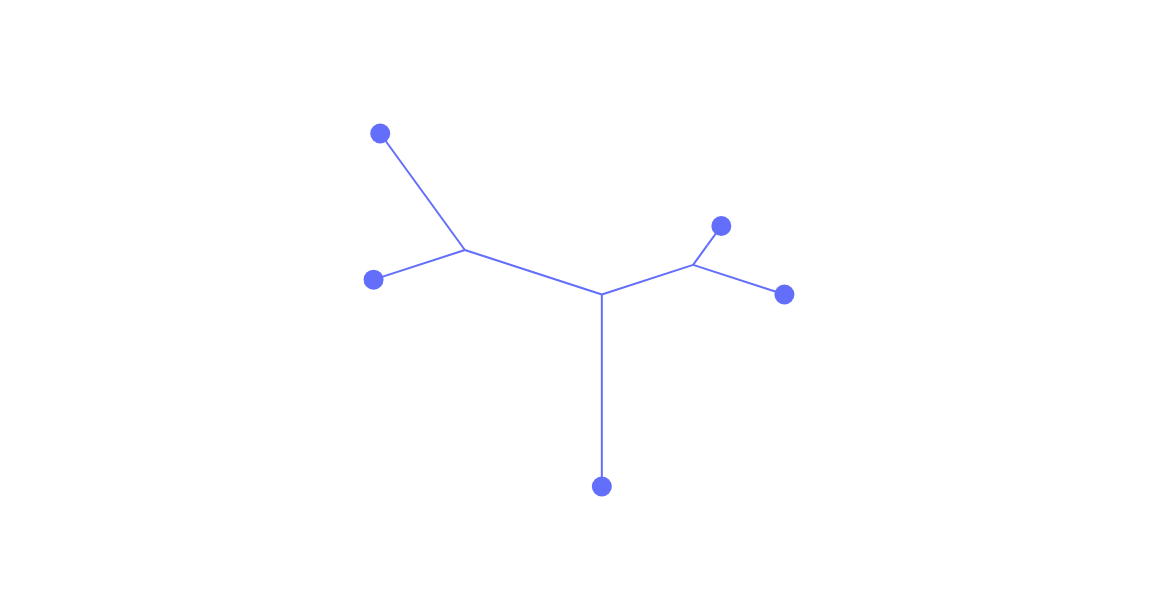

In [12]:
anjl.plot_equal_angle(root2, line_width=2, marker_size=20)

## Example 3 (small)

In [13]:
import zarr
from scipy.spatial.distance import squareform

In [14]:
small = zarr.load("../data/small/dist.zarr.zip")
D3 = squareform(small)
D3.shape

(181, 181)

In [16]:
Z3 = anjl.canonical_nj(D3)

In [17]:
root3 = anjl.to_tree(Z3)
root3

Node(id=360, dist=0, count=181)

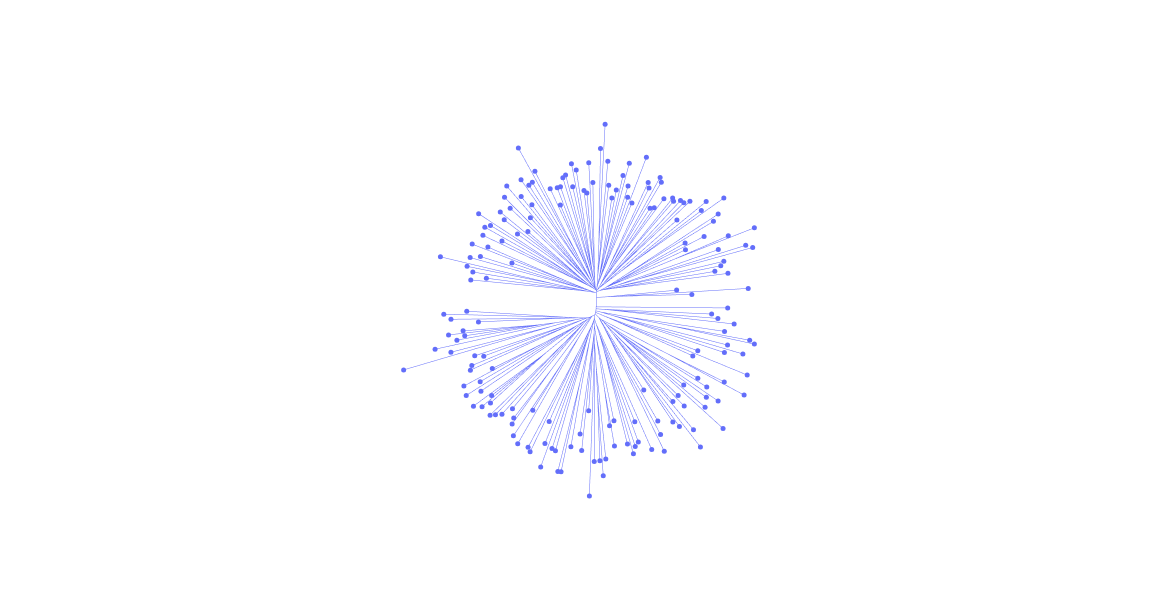

In [18]:
anjl.plot_equal_angle(root3, line_width=0.5)

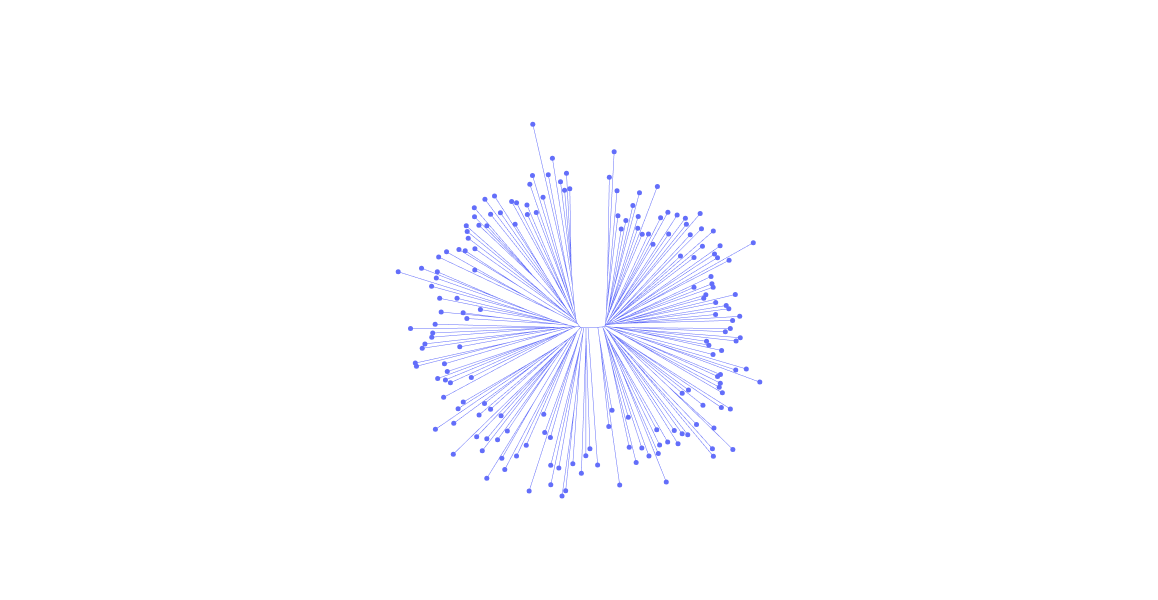

In [19]:
anjl.plot_equal_angle(root3, line_width=0.5, count_sort=True)

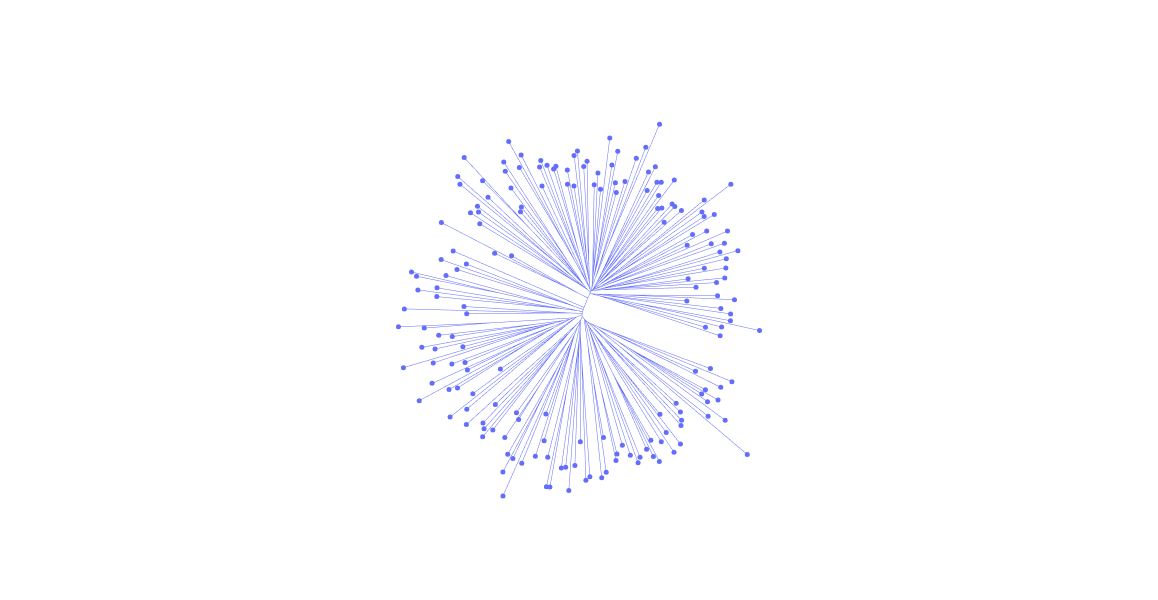

In [20]:
anjl.plot_equal_angle(root3, line_width=0.5, distance_sort=True)

## Example 4 (medium)

In [21]:
medium = zarr.load("../data/medium/dist.zarr.zip")
D4 = squareform(medium)
D4.shape

(472, 472)

In [22]:
Z4 = anjl.canonical_nj(D4)
Z4

array([[3.89000000e+02, 4.25000000e+02, 0.00000000e+00, 0.00000000e+00,
        2.00000000e+00],
       [9.00000000e+00, 7.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.00000000e+00],
       [4.52000000e+02, 4.69000000e+02, 6.97222233e+00, 5.02777767e+00,
        2.00000000e+00],
       ...,
       [9.38000000e+02, 9.39000000e+02, 2.23355591e-01, 1.39061511e-01,
        4.25000000e+02],
       [9.36000000e+02, 9.40000000e+02, 4.10231918e-01, 1.08985394e-01,
        4.40000000e+02],
       [9.37000000e+02, 9.41000000e+02, 1.57432839e-01, 1.57432839e-01,
        4.72000000e+02]], dtype=float32)

In [23]:
root4 = anjl.to_tree(Z4)
root4

Node(id=942, dist=0, count=472)

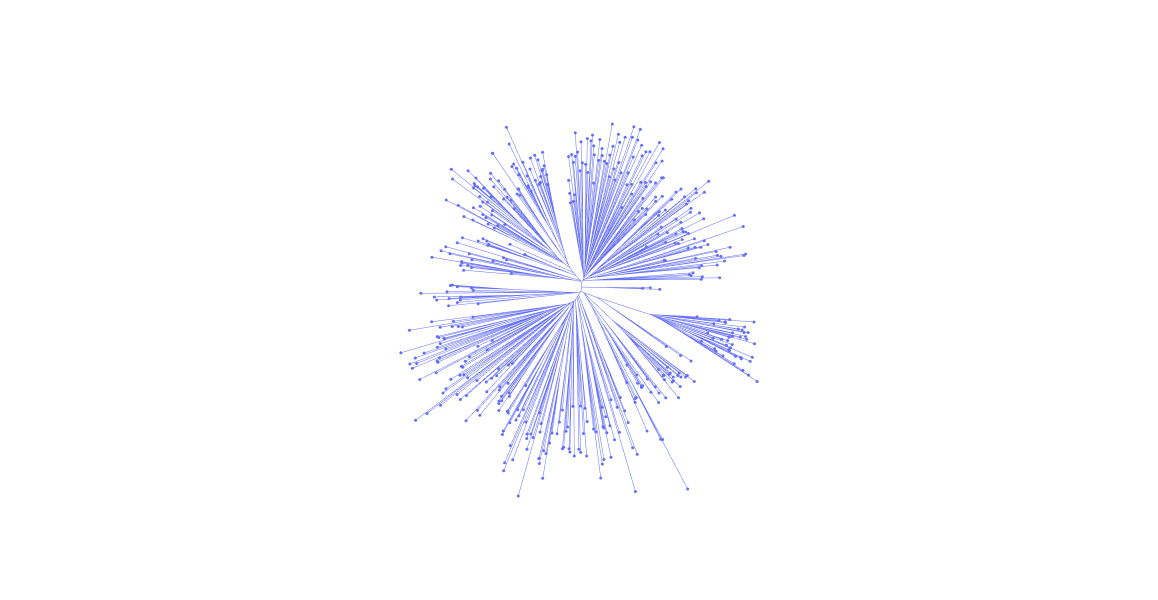

In [24]:
anjl.plot_equal_angle(
    root4,
    line_width=0.5,
    marker_size=3,
    width=600,
    height=600,
)

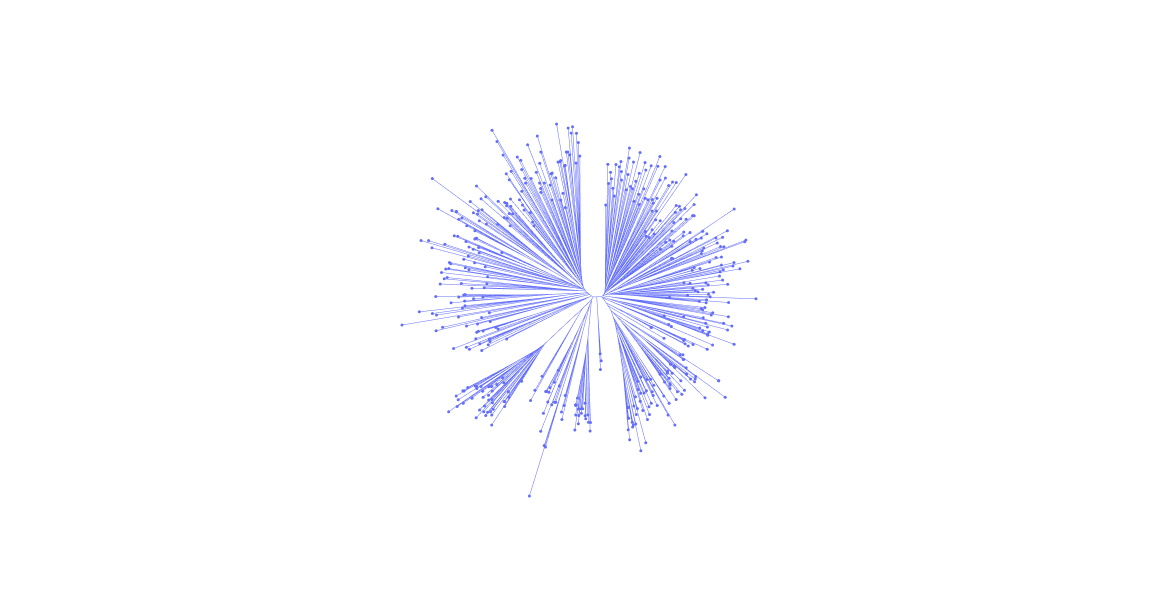

In [30]:
anjl.plot_equal_angle(
    root4,
    line_width=0.5,
    marker_size=3,
    width=600,
    height=600,
    count_sort=True,
)

## Example 5 (large)

In [25]:
large = zarr.load("../data/large/dist.zarr.zip")
D5 = squareform(large)
D5.shape

(3081, 3081)

In [26]:
Z5 = anjl.canonical_nj(D5)
Z5

array([[2.78700000e+03, 2.79300000e+03, 0.00000000e+00, 0.00000000e+00,
        2.00000000e+00],
       [2.79800000e+03, 3.08100000e+03, 0.00000000e+00, 0.00000000e+00,
        3.00000000e+00],
       [2.79900000e+03, 3.08200000e+03, 0.00000000e+00, 0.00000000e+00,
        4.00000000e+00],
       ...,
       [6.15100000e+03, 6.15500000e+03, 1.22633286e-01, 7.81196728e-02,
        2.51300000e+03],
       [6.15700000e+03, 6.15800000e+03, 5.71229570e-02, 6.03641197e-03,
        3.02200000e+03],
       [6.15600000e+03, 6.15900000e+03, 3.10413036e-02, 3.10413036e-02,
        3.08100000e+03]], dtype=float32)

In [27]:
root5 = anjl.to_tree(Z5)
root5

Node(id=6160, dist=0, count=3081)

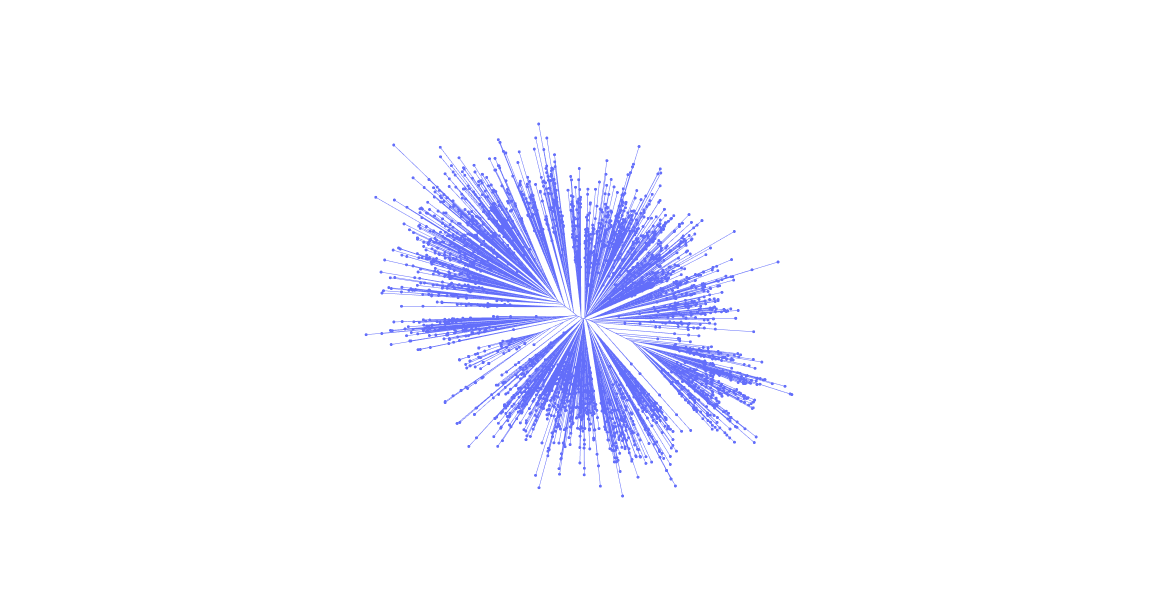

In [28]:
anjl.plot_equal_angle(
    root5,
    line_width=0.5,
    marker_size=3,
    width=600,
    height=600,
)

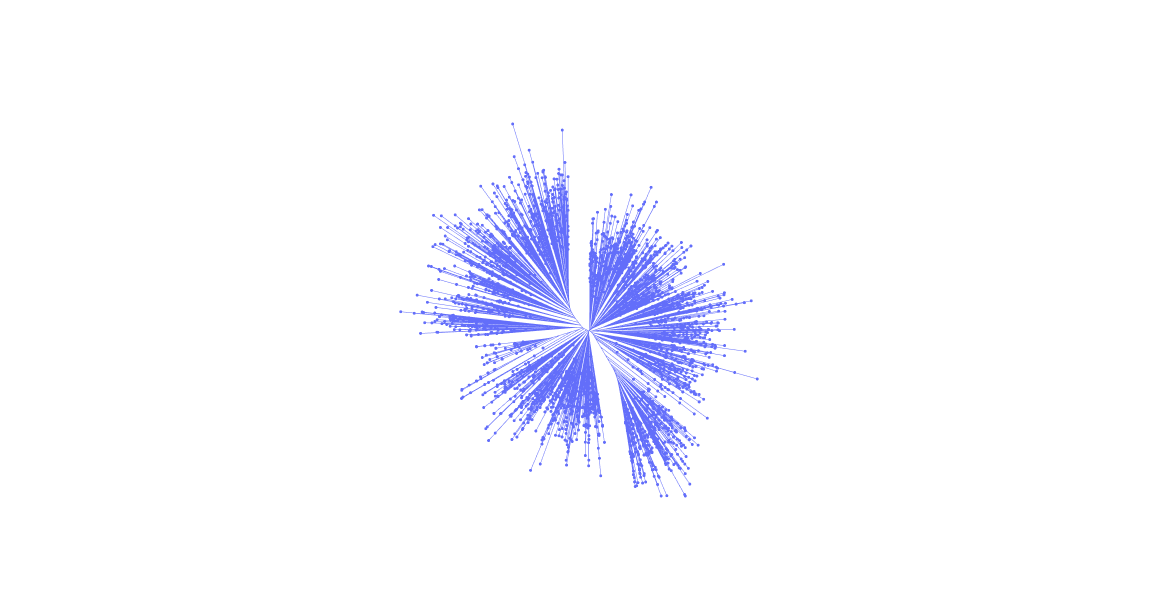

In [29]:
anjl.plot_equal_angle(
    root5,
    line_width=0.5,
    marker_size=3,
    width=600,
    height=600,
    render_mode="webgl",
    count_sort=True,
)